## EDA LAB

The General Social Survey (GSS) is a bi-annual nationally representative survey of Americans, with almost 7000 different questions asked since the survey began in the 1970s. It has straightforward questions about respondents' demographic information, but also questions like "Does your job regularly require you to perform repetitive or forceful hand movements or involve awkward postures?" or "How often do the demands of your job interfere with your family life?" There are a variety of controversial questions. No matter what you're curious about, there's something interesting in here to check out. The codebook is 904 pages (use CTRL+F to search it).

The data and codebook are available at:
https://gss.norc.org/us/en/gss/get-the-data.html

The datasets are so large that it might make sense to pick the variables you want, and then download just those variables from:
https://gssdataexplorer.norc.org/variables/vfilter

Here is your task:
1. Download a small (5-15) set of variables of interest. (You can also check out `get_gss.ipynb` for some processed data.)
2. Write a short description of the data you chose, and why. (~500 words)
3. Load the data using Pandas. Clean them up for EDA. Do this in this notebook with comments or markdown chunks explaining your choices.
4. Produce some numeric summaries and visualizations.
5. Describe your findings. (500 - 1000 words, or more)

For example, you might want to look at how aspects of a person's childhood family are correlated or not with their career or family choices as an adult. Or how political or religious affiliations correlate with drug use or sexual practices. It's an extremely wide-ranging survey.


In [ ]:
#Q2
#For this analysis we chose 8 variables to tell a story that connects how people work to how they feel about life, relationships, and social standing. The eight variables are:
#hrs2 — usual hours worked per week (work intensity / time demand)
#wrkslf — employment arrangement (self-employed vs. works for someone else)
#happy — general happiness (primary subjective well-being outcome)
#sathealt  health/physical condition (health dimension of well-being)
#hapmar — happiness with marriage (relationship/family well-being)
#childs — number of children (realized family size)
#chldidel — ideal number of children (family preferences/values)
#prestige — occupational prestige score (social standing/status)

#We feel as though these variables cover areas most people would commonly determine their “quality of life”. These specific areas include subjective well-being, family context and work patterns.
#Diving a little deeper, usual hours worked per week and employment arrangements reflect core dimensions of work such as time commitment and autonomy.
#These are factors that are common indicators of job demands, stress, and potential time scarcity which can all tie back to overall happiness and quality of life.
#Work is also central for providing income and status, which connect directly to the last variable chosen, prestige. This foundation sets the stage for looking at how these
#intertwined aspects contribute to overall life satisfaction and guiding potential social or workplace interventions.

#The next area we are interested in is looking at subjective well-being. The key variable here is happy to describe the general happiness and then we can slice that even further
#by looking at happiness with marriage and then health status. Hapmar displays the relationship dimension while health conditions introduce the physical aspect,
#both factors which are widely known to be strong predictors of happiness across populations. Family context more broadly is represented
#with childs (realized fertility) and chldidel (family ideals/preferences), which allow for a comparison between what people desire and what they actually experience in terms of family life.
#This is an interesting aspect to examine because it highlights the gap between expectations and reality in family life, which can have important effects
#on overall life satisfaction and well-being.

#Finally, prestige ties back into the link between work and the broader perception of social status. It not only reflects occupational standing in society but also
#gives us the chance to test whether prestige is strongly aligned with happiness, or whether other factors like health and relationships matter more.

#Overall, these variables were chosen because they comprise common markers of life quality that describe subjective and objective realms.
#These are categories most people would consider when reflecting on their lives. By selecting this set, we can explore correlations, connections, and potential tensions.
#For example, whether longer work hours actually do detract from happiness, whether relationship satisfaction outweighs work-based stress, and how closely status relates to well-being.

In [ ]:
import pandas as pd
var_list = ['hrs2', 'prestige', 'sathealt', 'happy', 'hapmar', 'childs', 'chldidel', 'wrkslf']
output_filename = 'selected_variables_gss_data.csv'
phase=0
for k in range(3): # for each chunk of the data
    url = 'https://github.com/DS3001/project_gss/raw/main/gss_chunk_' + str(1+k) + '.parquet' # Create url to the chunk to be processed
    print(url) # Check the url is correct
    df = pd.read_parquet(url) # Download this chunk of data
    print(df.head()) # Visually inspect the first few rows
    if phase == 0 :
        df.loc[:,var_list].to_csv(output_filename, # specifies target file to save the chunk to
                                mode='w', # control write versus append
                                header=var_list, # variable names
                                index=False) # no row index saved
        phase = 1 # Switch from write mode to append mode
    elif phase == 1 :
        df.loc[:,var_list].to_csv(output_filename, # specifies target file to save the chunk to
                                mode='a', # control write versus append
                                header=None, # variable names
                                index=False) # no row index saved
        phase = 1 # Switch from write mode to append mode

https://github.com/DS3001/project_gss/raw/main/gss_chunk_1.parquet
   year  id            wrkstat  hrs1  hrs2 evwork    occ  prestige  \
0  1972   1  working full time   NaN   NaN    NaN  205.0      50.0   
1  1972   2            retired   NaN   NaN    yes  441.0      45.0   
2  1972   3  working part time   NaN   NaN    NaN  270.0      44.0   
3  1972   4  working full time   NaN   NaN    NaN    1.0      57.0   
4  1972   5      keeping house   NaN   NaN    yes  385.0      40.0   

         wrkslf wrkgovt  ...  agehef12 agehef13 agehef14  hompoph wtssps_nea  \
0  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
1  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
2  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
3  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
4  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   

   wtssnrps_nea  wtssps_next wt

In [ ]:
df = pd.read_csv('selected_variables_gss_data.csv')
df

/tmp/ipython-input-520507434.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('selected_variables_gss_data.csv')


,hrs2,prestige,sathealt,happy,hapmar,childs,chldidel,wrkslf
0,NaN,50.0,NaN,not too happy,NaN,0.0,2.0,someone else
1,NaN,45.0,NaN,not too happy,NaN,5.0,3.0,someone else
2,NaN,44.0,NaN,pretty happy,NaN,4.0,2.0,someone else
3,NaN,57.0,NaN,not too happy,NaN,0.0,2.0,someone else
4,NaN,40.0,NaN,pretty happy,NaN,2.0,2.0,someone else
...,...,...,...,...,...,...,...,...
72385,NaN,NaN,NaN,pretty happy,NaN,0.0,8.0,someone else
72386,NaN,NaN,NaN,pretty happy,very happy,2.0,8.0,someone else
72387,NaN,NaN,NaN,pretty happy,NaN,1.0,4.0,someone else
72388,NaN,NaN,NaN,very happy,very happy,0.0,NaN,someone else


In [ ]:
df['hrs2']

,hrs2
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
24125,NaN
24126,NaN
24127,NaN
24128,NaN


In [ ]:
df.dropna()

,hrs2,prestige,sathealt,happy,hapmar,childs,chldidel,wrkslf
3248,40.0,17.0,a fair amount,not too happy,very happy,6.0,3.0,someone else
3257,40.0,17.0,very great deal,pretty happy,very happy,1.0,2.0,someone else
3296,40.0,72.0,very great deal,not too happy,pretty happy,3.0,2.0,someone else
3330,5.0,25.0,a fair amount,very happy,very happy,6.0,2.0,someone else
3391,40.0,62.0,very great deal,very happy,very happy,2.0,4.0,someone else
...,...,...,...,...,...,...,...,...
24187,35.0,31.0,very great deal,very happy,very happy,0.0,2.0,someone else
24561,38.0,46.0,a fair amount,pretty happy,pretty happy,2.0,3.0,someone else
24665,32.0,61.0,great deal,very happy,very happy,3.0,8.0,someone else
24855,50.0,51.0,a fair amount,pretty happy,very happy,0.0,4.0,someone else


In [ ]:
df[['happy','wrkslf' ]]

,happy,wrkslf
0,not too happy,someone else
1,not too happy,someone else
2,pretty happy,someone else
3,not too happy,someone else
4,pretty happy,someone else
...,...,...
72385,pretty happy,someone else
72386,pretty happy,someone else
72387,pretty happy,someone else
72388,very happy,someone else


In [ ]:
df['happy'].value_counts()

,count
happy,
pretty happy,37813
very happy,20385
not too happy,9390


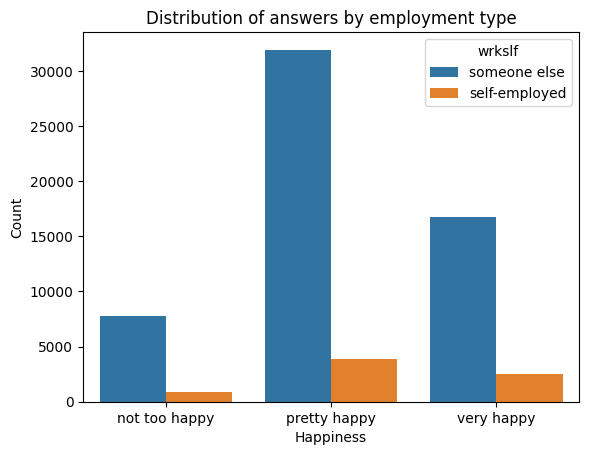

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x="happy", hue="wrkslf")

plt.xlabel("Happiness")
plt.ylabel("Count")
plt.title("Distribution of answers by employment type")
plt.show()

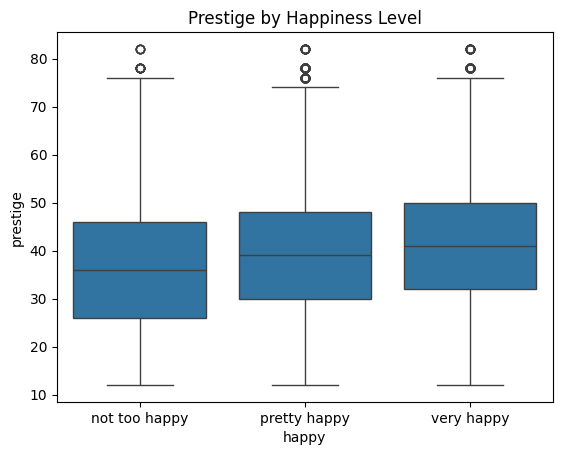

In [ ]:
sns.boxplot(data=df, x="happy", y="prestige")
plt.title("Prestige by Happiness Level")
plt.show()

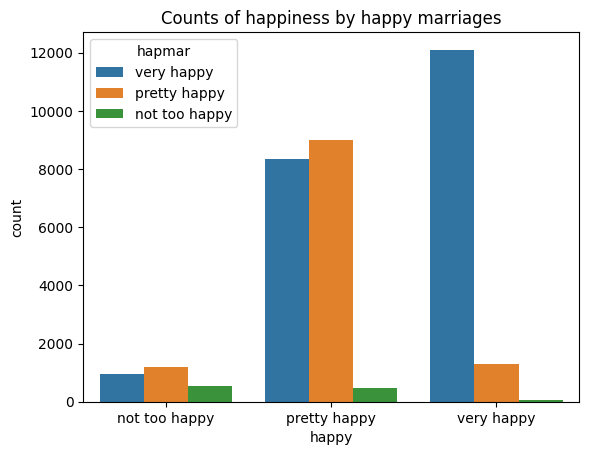

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x="happy", hue="hapmar")
plt.title("Counts of happiness by happy marriages")
plt.show()

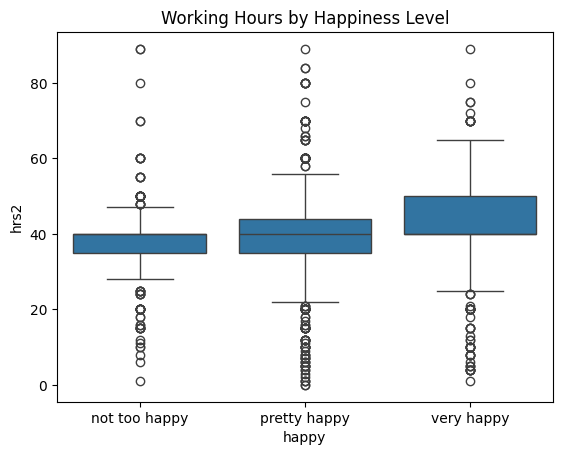

In [ ]:
sns.boxplot(data=df, x="happy", y="hrs2")
plt.title("Working Hours by Happiness Level")
plt.show()

In [ ]:
#Quality of Life Score
df['sathealt'].value_counts()
#Values of Health and Physical Condition are none, a little, some, a fair amount, quite a bit, great deal, and very great deal
df['happy'].value_counts()
#Values of Happiness are not too happy, pretty happy, and very happy
df['hapmar'].value_counts()
#Values of Happy Marriage are not too happy, pretty happy, and very happy

mapping = {"not too happy": 1, "pretty happy": 2, "very happy": 3, "none": 1, "a little": 2, "some": 3, "a fair amount": 4, "quite a bit": 5, "great deal": 6, "very great deal": 7}
map_df = df.replace(mapping)

/tmp/ipython-input-2594744237.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  map_df = df.replace(mapping)


In [ ]:
#Quality of Life Score
df['sathealt'].value_counts()
#Values of Health and Physical Condition are none, a little, some, a fair amount, quite a bit, great deal, and very great deal
df['happy'].value_counts()
#Values of Happiness are not too happy, pretty happy, and very happy
df['hapmar'].value_counts()
#Values of Happy Marriage are not too happy, pretty happy, and very happy

mapping = {"not too happy": 1, "pretty happy": 2, "very happy": 3, "none": 1, "a little": 2, "some": 3, "a fair amount": 4, "quite a bit": 5, "great deal": 6, "very great deal": 7}
map_df = df.replace(mapping)
map_df = map_df.dropna()
map_df

/tmp/ipython-input-3059000834.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  map_df = df.replace(mapping)


,hrs2,prestige,sathealt,happy,hapmar,childs,chldidel,wrkslf
3248,40.0,17.0,4.0,1.0,3.0,6.0,3.0,someone else
3257,40.0,17.0,7.0,2.0,3.0,1.0,2.0,someone else
3296,40.0,72.0,7.0,1.0,2.0,3.0,2.0,someone else
3330,5.0,25.0,4.0,3.0,3.0,6.0,2.0,someone else
3391,40.0,62.0,7.0,3.0,3.0,2.0,4.0,someone else
3431,40.0,43.0,6.0,2.0,2.0,2.0,2.0,someone else
3432,40.0,47.0,6.0,2.0,1.0,2.0,3.0,someone else
3464,40.0,61.0,7.0,3.0,3.0,3.0,2.0,someone else
3507,40.0,49.0,7.0,3.0,3.0,2.0,8.0,self-employed
3516,40.0,51.0,7.0,3.0,3.0,3.0,3.0,someone else


In [ ]:
map_df['Target Number of Children'] = (map_df['childs'] == map_df['chldidel']).astype(int)
map_df['Quality of Life Index'] = map_df['sathealt'] + map_df['happy'] + map_df['hapmar'] + map_df['Target Number of Children']
pd.set_option("display.max_rows", None)
map_df


,hrs2,prestige,sathealt,happy,hapmar,childs,chldidel,wrkslf,Target Number of Children,Quality of Life Index
3248,40.0,17.0,4.0,1.0,3.0,6.0,3.0,someone else,0,8.0
3257,40.0,17.0,7.0,2.0,3.0,1.0,2.0,someone else,0,12.0
3296,40.0,72.0,7.0,1.0,2.0,3.0,2.0,someone else,0,10.0
3330,5.0,25.0,4.0,3.0,3.0,6.0,2.0,someone else,0,10.0
3391,40.0,62.0,7.0,3.0,3.0,2.0,4.0,someone else,0,13.0
3431,40.0,43.0,6.0,2.0,2.0,2.0,2.0,someone else,1,11.0
3432,40.0,47.0,6.0,2.0,1.0,2.0,3.0,someone else,0,9.0
3464,40.0,61.0,7.0,3.0,3.0,3.0,2.0,someone else,0,13.0
3507,40.0,49.0,7.0,3.0,3.0,2.0,8.0,self-employed,0,13.0
3516,40.0,51.0,7.0,3.0,3.0,3.0,3.0,someone else,1,14.0


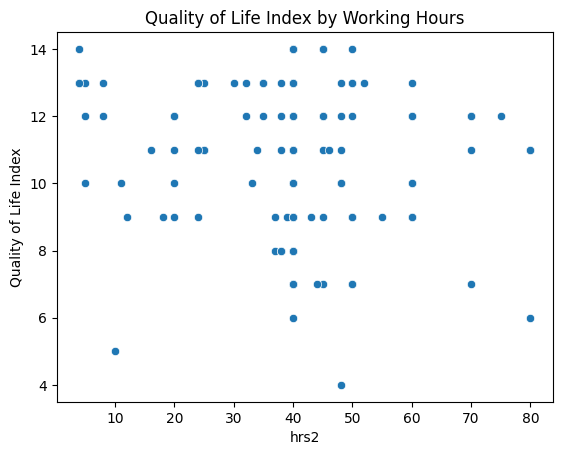

In [ ]:
sns.scatterplot(data=map_df, x="hrs2", y="Quality of Life Index")
plt.title("Quality of Life Index by Working Hours")
plt.show()

In [ ]:
#Q4
#Overall happiness is high and skewed toward the middle category. The frequency table shows that “pretty happy” is the most common response (≈37.8k),
#followed by “very happy” (≈20.4k), with “not too happy” (≈9.4k) being the smallest group. The employment-type bar chart (Plot 1) makes two things clear:
#respondents working for “someone else” dominate the sample, and within both employment types, “pretty happy” is the most common choice. Self-employment is present
#but comparatively rare (bars in the low thousands vs. tens of thousands for employees), so any self-employment contrasts should be interpreted cautiously.
#Occupational prestige varies positively, but not deterministically, with happiness. The prestige boxplots by happiness level (Plot 2) show a step-up in medians
#from “not too happy” to “pretty happy” to “very happy,” and the upper quartiles shift upward as well. Outliers extend into the high-prestige 70–80+ range in all groups,
#with outliers being the most common for “pretty happy”. The distributions still overlap substantially. Prestige appears associated with happiness, but not a guarantee of it.
#General happiness is strongly aligned with marital happiness. The grouped bar chart of happiness by hapmar (Plot 3) shows a striking diagonal:
#respondents who say their marriage/relationship is “very happy” are disproportionately found among those who report being “very happy” overall.
#The bar for “very happy”/“very happy” towers over other combinations. The “not too happy” marital group is largely concentrated among respondents who also report lower general happiness.
#This is descriptive, not causal, but consistent with the idea that relationship quality is a large contributor to overall life satisfaction.
#Weekly hours differ little at the center, with wider dispersion among the very happy. The hours boxplots by happiness (Plot 4) put the median in all groups near about 40 hours,
#with only small shifts across categories. The interesting part is dispersion: the “very happy” group shows a wider upper tail, with whiskers and points reaching 65–90 hours,
#whereas the “not too happy” group’s upper whisker tends to cap lower (≈50–60 hours). This suggests that while most people across all happiness levels cluster around standard full-time work,
#some very happy respondents are also working longer weeks. However, we lack certain control variables (like income and occupation), so we can’t say whether long hours raise
#happiness or simply occur among people who are otherwise thriving.
#A composite “Quality-of-Life” (QoL) index shows little relationship with work hours. The scatter of QoL vs. hours (Plot 5) is essentially a cloud with no strong slope:
#high and low QoL scores appear across short, standard, and long workweeks. If anything, visually there may be a slight flattening (greater QoL variation among 35–55 hours),
#but no clear linear pattern emerges. This fits the hours boxplots: hours alone don’t explain much once you think about multiple life factors.
#Main takeaways:
#Marital/relationship well-being appears tightly coupled with general happiness (Plot 3), more so than work hours (Plot 4) and likely more than employment status (Plot 1).
#Occupational prestige has a slight positive association with happiness (Plot 2), but with heavy overlap as people can be happy in lower-prestige jobs and unhappy in high-prestige ones.
#Work hours around the 35–45 are typical in every happiness group; longer weeks are compatible with high happiness for some respondents, but they are neither necessary nor sufficient for
#high QoL (Plot 5).
#Health satisfaction and having the number of children one considers ideal also show clear positive links with overall QoL reinforcing that family and health domains weigh more heavily
#than hours worked.


#There were some limitations to the data we used. Work hours (hrs2) and marital happiness (hapmar) are missing values more often than general happiness, which reduces the sample size
#and may bias results if certain groups chose to skip those questions. We can’t rule out factors like self-selection into certain categories or confounding variables like age, education,
#and income. To improve the data, we could add controls for  such factors in regression models, and  compare across decades to see if links between prestige, happiness,
#or marriage have changed over time.
#Bottom line: In this subset of the GSS data, Americans cluster in the “pretty happy” range, relationship quality is the strongest correlate of general happiness,
#prestige correlates positively but imperfectly, and weekly hours by themselves do not explain much variation in an overall quality-of-life measure.
